In [599]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR


In [600]:
data = pd.read_csv('/home/hasan/Desktop/DATA_SET/BigMart-Sales/big-mart-sales.csv')

In [601]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809200,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269200,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.618000,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.095000,OUT010,1998,NaN,Tier 3,Grocery Store,732.380000
4,NCD19,8.930000,Low Fat,0.000000,Household,53.861400,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200


In [602]:
data.shape

(8523, 12)

# Data Cleaning

In [603]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [604]:
#checking null value
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [605]:
#filling null value with mean value using SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = si.fit(data[['Item_Weight']])
data['Item_Weight'] = imputer.transform(data[['Item_Weight']])

In [606]:
#filling null value of 'Outlet_Size' column using fillna function
data.fillna(method='ffill', inplace=True)

In [607]:
#shuffle dataset
data = data.sample(frac=1).reset_index(drop=True)

In [608]:
#fixing 'Item_Fat_Content' column
data['Item_Fat_Content'].unique()

array(['Regular', 'Low Fat', 'LF', 'reg', 'low fat'], dtype=object)

In [609]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].str.replace('low fat','Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].str.replace('LF','Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].str.replace('reg','Regular')

In [610]:
data['Item_Fat_Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [611]:
#fixing 'Outlet_Type' column
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

In [612]:
data['Outlet_Type'] = data['Outlet_Type'].str.replace('Supermarket Type1', 'Supermarket')
data['Outlet_Type'] = data['Outlet_Type'].str.replace('Supermarket Type2', 'Supermarket')
data['Outlet_Type'] = data['Outlet_Type'].str.replace('Supermarket Type3', 'Supermarket')

In [613]:
data['Outlet_Type'].unique()

array(['Supermarket', 'Grocery Store'], dtype=object)

# After cleaning dataset

In [614]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDB38,19.500000,Regular,0.027347,Canned,158.992000,OUT046,1997,Small,Tier 1,Supermarket,1757.712000
1,FDQ15,20.350000,Regular,0.151308,Meat,81.727600,OUT049,1999,Medium,Tier 1,Supermarket,2030.690000
2,NCC54,17.750000,Low Fat,0.097692,Health and Hygiene,242.419600,OUT035,2004,Small,Tier 2,Supermarket,5543.450800
3,FDH41,9.000000,Low Fat,0.081943,Frozen Foods,214.553400,OUT013,1987,High,Tier 3,Supermarket,3440.854400
4,NCB54,8.760000,Low Fat,0.050336,Health and Hygiene,126.233600,OUT017,2007,Medium,Tier 2,Supermarket,1406.169600


In [615]:
data.shape

(8523, 12)

# Data Analysis

In [616]:
data['Item_Identifier'].nunique()

1559

In [617]:
#most appeared Item_Identifier
df = pd.DataFrame(data.groupby('Item_Identifier').Item_Identifier.agg(['count']).sort_values(by='count', ascending=False))
df = df.head(10)
df

,count
Item_Identifier,
FDG33,10
FDW13,10
NCL31,9
FDX04,9
NCQ06,9
NCF42,9
FDD38,9
FDX31,9
DRE49,9


Text(0, 0.5, 'total identifier')

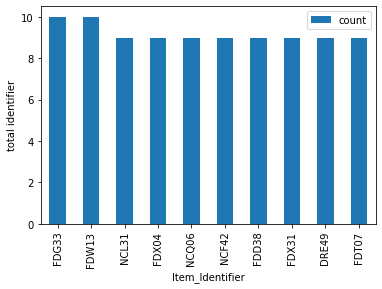

In [618]:
#plotting the previous data
df.plot(kind='bar')
plt.ylabel('total identifier')

In [619]:
#10 most unique item's weight

In [620]:
#unique items
unique_item = list(data['Item_Identifier'].unique())
index = []

#seperating two columns
df = data.loc[:,['Item_Identifier','Item_Weight']]

#separating unique item's maximum weight
for i in unique_item:
    unique_item_df = df[df['Item_Identifier']==i]
    
    index.append(unique_item_df['Item_Weight'].idxmax())

#printing only unique item's maximum weight
unique_max_weight = df.loc[index,['Item_Identifier','Item_Weight']].sort_values(by='Item_Weight', ascending=False)   
unique_max_weight.head(10)

,Item_Identifier,Item_Weight
1724,FDC02,21.350000
1779,FDR07,21.350000
1002,NCX17,21.250000
103,FDT03,21.250000
686,NCO42,21.250000
628,FDA45,21.250000
1345,FDQ21,21.250000
2124,FDW10,21.200000
681,FDG35,21.200000
404,NCE42,21.100000


In [621]:
#total number of low fat and regular fat and their percent 

In [622]:
#finding total number
total = data['Item_Fat_Content'].count()

#groping of Item_Fat_Content column
df = pd.DataFrame(data.groupby(['Item_Fat_Content']).Item_Identifier.agg(['count']))

#finding percent
percent = df['count']/total*100
df['percent'] = percent
df

,count,percent
Item_Fat_Content,,
Low Fat,5517,64.730729
Regular,3006,35.269271


In [623]:
#10 most visible items

In [624]:
df = data.loc[:,['Item_Identifier','Item_Type','Item_Visibility']].sort_values(by='Item_Visibility', ascending=False)
df.head(10)

,Item_Identifier,Item_Type,Item_Visibility
4889,FDU13,Canned,0.328391
1933,NCZ18,Household,0.325781
2520,FDJ56,Fruits and Vegetables,0.321115
243,FDT24,Baking Goods,0.311090
7077,NCE31,Household,0.309390
2716,FDG32,Fruits and Vegetables,0.308145
5823,DRF01,Soft Drinks,0.306543
5314,FDI32,Fruits and Vegetables,0.305305
8034,FDS12,Baking Goods,0.304859
4954,FDR14,Dairy,0.304737


In [625]:
#counting of low fat and regular fat item and visibility_sum, visibility_mean based on Item_Fat_Content

In [626]:
#grouping of Item_Fat_Content column
df = pd.DataFrame(data.groupby(['Item_Fat_Content']).Item_Fat_Content.agg(['count']))

#calculating sum visibility of Item_Fat_Content
visibility_sum = data.groupby('Item_Fat_Content').Item_Visibility.agg(['sum'])
df['visibility_sum'] = visibility_sum

#calculating mean visibility of Item_Fat_Content 
visibility_mean = data.groupby('Item_Fat_Content').Item_Visibility.agg(['mean'])
df['visibility_mean'] = visibility_mean
df

,count,visibility_sum,visibility_mean
Item_Fat_Content,,,
Low Fat,5517,354.909065,0.064330
Regular,3006,208.734216,0.069439


In [627]:
#Item_Type column

In [628]:
data['Item_Type'].nunique()

16

In [629]:
data['Item_Type'].unique()

array(['Canned', 'Meat', 'Health and Hygiene', 'Frozen Foods',
       'Fruits and Vegetables', 'Hard Drinks', 'Others', 'Snack Foods',
       'Dairy', 'Breakfast', 'Soft Drinks', 'Starchy Foods', 'Breads',
       'Household', 'Baking Goods', 'Seafood'], dtype=object)

In [630]:
#total number of Item_Type
total_number = data['Item_Type'].count()

#counting every items
df = pd.DataFrame(data.groupby(['Item_Type']).Item_Type.agg(['count']).sort_values(by='count', ascending=False))

#find percent of every item
percent = df['count']/total_number*100
df['percent'] = percent
df

,count,percent
Item_Type,,
Fruits and Vegetables,1232,14.455004
Snack Foods,1200,14.079549
Household,910,10.676992
Frozen Foods,856,10.043412
Dairy,682,8.001877
Canned,649,7.614690
Baking Goods,648,7.602957
Health and Hygiene,520,6.101138
Soft Drinks,445,5.221166


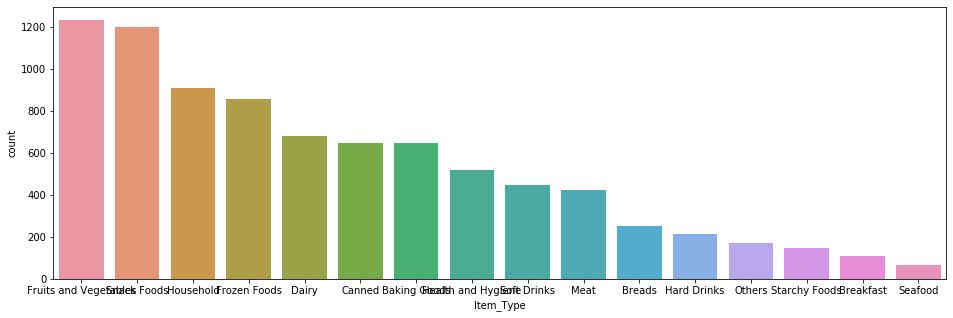

In [631]:
#sum of every item using barplot
plt.figure(figsize=(16,5))
sns.barplot(x=df.index, y=df['count'])

Text(0, 0.5, 'percent of item')

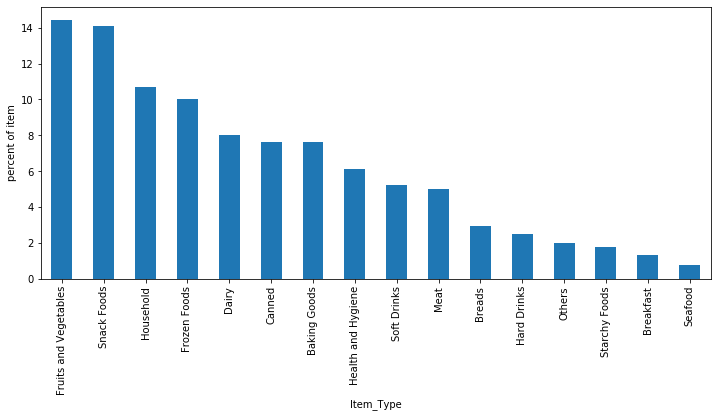

In [632]:
#percent of every item
plt.figure(figsize=(12,5))
df['percent'].plot(kind='bar')
plt.ylabel('percent of item')

In [633]:
#sum, percent based on Item_Type and Item_Fat_Content

In [634]:
#total of Item_Fat_Content
total_item_fat = data['Item_Fat_Content'].count()

#count of Item_Fat_Content based on Item_Type and Item_Fat_Content
df = pd.DataFrame(data.groupby(['Item_Type','Item_Fat_Content']).Item_Fat_Content.agg(['count']))

#calculating percent 
percent = df['count']/total_item_fat*100
df['percent'] = percent
df

count   percent
Item_Type             Item_Fat_Content                 
Baking Goods          Low Fat             329  3.860143
                      Regular             319  3.742814
Breads                Low Fat             140  1.642614
                      Regular             111  1.302358
Breakfast             Low Fat              41  0.481051
                      Regular              69  0.809574
Canned                Low Fat             341  4.000939
                      Regular             308  3.613751
Dairy                 Low Fat             418  4.904376
                      Regular             264  3.097501
Frozen Foods          Low Fat             450  5.279831
                      Regular             406  4.763581
Fruits and Vegetables Low Fat             630  7.391763
                      Regular             602  7.063241
Hard Drinks           Low Fat             214  2.510853
Health and Hygiene    Low Fat             520  6.101138
Household             Low Fat             910 10.676992
Meat                  Low Fat             170  1.994603
                      Regular             255  2.991904
Others                Low Fat             169  1.982870
Seafood               Low Fat              37  0.434119
                      Regular              27  0.316790
Snack Foods           Low Fat             692  8.119207
                      Regular             508  5.960343
Soft Drinks           Low Fat             374  4.388126
                      Regular              71  0.833040
Starchy Foods         Low Fat              82  0.962103
                      Regular              66  0.774375

In [635]:
#sum, min, mean, and max of Item_MRP based on Item_Type

In [636]:
df = pd.DataFrame(data.groupby(['Item_Type']).Item_MRP.agg(['sum','min','mean','max']))
df.columns = ['total_price_of_item', 'minimum_price_of_item', 'mean_price_of_item', 'maximum_price_of_item']
df

,total_price_of_item,minimum_price_of_item,mean_price_of_item,maximum_price_of_item
Item_Type,,,,
Baking Goods,81894.736400,33.987400,126.380766,265.556800
Breads,35379.119800,31.955800,140.952669,263.659400
Breakfast,15596.696600,40.048000,141.788151,234.930000
Canned,90706.727000,36.350600,139.763832,266.888400
Dairy,101276.459600,33.487400,148.499208,266.688400
Frozen Foods,118558.881400,31.955800,138.503366,264.891000
Fruits and Vegetables,178124.081000,36.250600,144.581235,264.225200
Hard Drinks,29334.676600,34.253200,137.077928,261.427800
Health and Hygiene,68025.838800,33.121600,130.818921,266.688400


In [637]:
#sum, min, mean, max of Item_Outlet_Sales based on Item_Type

In [638]:
df = pd.DataFrame(data.groupby(['Item_Type']).Item_Outlet_Sales.agg(['sum','min','mean','max']))
df.columns=['total_outlet_sales', 'minimum_sales', 'mean_sales', 'maximum_sales']
df

,total_outlet_sales,minimum_sales,mean_sales,maximum_sales
Item_Type,,,,
Baking Goods,1265525.342200,37.284800,1952.971207,7931.675400
Breads,553237.188800,35.287400,2204.132226,8958.339000
Breakfast,232298.951600,39.948000,2111.808651,8209.314000
Canned,1444151.492600,37.950600,2225.194904,10306.584000
Dairy,1522594.051200,40.613800,2232.542597,10256.649000
Frozen Foods,1825734.788600,36.619000,2132.867744,9678.068800
Fruits and Vegetables,2820059.816800,45.274400,2289.009592,12117.560000
Hard Drinks,457793.427200,37.950600,2139.221622,7843.124000
Health and Hygiene,1045200.137800,34.621600,2010.000265,9779.936200


In [639]:
#total sales of different product in different outlet 

In [640]:
df = pd.DataFrame(data.groupby(['Outlet_Identifier','Item_Type']).Item_Outlet_Sales.agg(['sum']))
df = df.rename(columns={'sum':'total_sales'})
df


total_sales
Outlet_Identifier Item_Type                  
OUT010            Baking Goods   10693.413800
                  Breads          7657.365800
                  Breakfast       4081.354000
                  Canned          9019.592600
                  Dairy          15307.407800
...                                       ...
OUT049            Others         47772.481600
                  Seafood        11827.271200
                  Snack Foods   350244.090000
                  Soft Drinks    97585.640200
                  Starchy Foods  42019.969600

[160 rows x 1 columns]

In [641]:
#wich item will found in which type of outlet and in which location

In [642]:
data.groupby(['Outlet_Type','Outlet_Location_Type','Item_Type']).Item_Type.agg(['count'])

count
Outlet_Type   Outlet_Location_Type Item_Type           
Grocery Store Tier 1               Baking Goods      43
                                   Breads            16
                                   Breakfast         10
                                   Canned            38
                                   Dairy             49
...                                                 ...
Supermarket   Tier 3               Others            51
                                   Seafood           19
                                   Snack Foods      394
                                   Soft Drinks      140
                                   Starchy Foods     50

[80 rows x 1 columns]

In [643]:
#type of outliet size based on establishment year

In [644]:
data.groupby(['Outlet_Establishment_Year','Outlet_Size']).Outlet_Size.agg(['count'])

count
Outlet_Establishment_Year Outlet_Size       
1985                      Medium         935
                          Small          528
1987                      High           932
1997                      Small          930
1998                      High            79
                          Medium         260
                          Small          216
1999                      Medium         930
2002                      High           145
                          Medium         455
                          Small          329
2004                      Small          930
2007                      High           134
                          Medium         404
                          Small          388
2009                      Medium         928

In [645]:
#total sales in Grocery Store and Supermarket

In [646]:
#for full number visible
pd.set_option('float_format', '{:f}'.format)

#total sales in two outlet
total_sales = data['Item_Outlet_Sales'].sum()

#total sales in two outlet
df = pd.DataFrame(data.groupby(['Outlet_Type']).Item_Outlet_Sales.agg(['sum']))

#total sales in percent in two outlet
percent = df['sum']/total_sales*100
df['percent'] = percent

#changing columns name
df.columns = ['total_outlet_sales','percent_of_outlet_sales']
df

,total_outlet_sales,percent_of_outlet_sales
Outlet_Type,,
Grocery Store,368034.266000,1.979623
Supermarket,18223091.144400,98.020377


In [647]:
#total_sale, minimum_sale, mean_sale and maximum_sale based on Outlet_Type and Outlet_Size

In [648]:
data.groupby(['Outlet_Type','Outlet_Size']).Item_Outlet_Sales.agg(['sum','min','mean','max'])

sum        min        mean          max
Outlet_Type   Outlet_Size                                                   
Grocery Store High          28866.424800  49.269200  365.397782  1342.252800
              Medium        90331.083400  39.948000  347.427244  1575.282800
              Small        248836.757800  33.290000  334.458008  1775.688600
Supermarket   High        2788403.024200  73.238000 2302.562365 10256.649000
              Medium      9451961.122600  69.243200 2588.160220 13086.964800
              Small       5982726.997600 101.867400 2321.585952  9779.936200

In [649]:
#total sales and percent in every outlet

In [650]:
#calculating total sales
total_sales = data['Item_Outlet_Sales'].sum()

#calculating total sales in every outlet
df = pd.DataFrame(data.groupby(['Outlet_Identifier']).Item_Outlet_Sales.agg(['sum']).sort_values(by='sum', ascending=False))

#percent of sales in every outlet
percent = df['sum']/total_sales*100
df['sales_in_percent'] = percent

#changing column name
df = df.rename(columns={'sum':'total_sales'})
df

,total_sales,sales_in_percent
Outlet_Identifier,,
OUT027,3453926.051400,18.578359
OUT035,2268122.935400,12.200030
OUT049,2183969.810200,11.747378
OUT017,2167465.294000,11.658602
OUT013,2142663.578200,11.525196
OUT046,2118395.168200,11.394658
OUT045,2036725.477000,10.955364
OUT018,1851822.830000,9.960789
OUT010,188340.172400,1.013065


# Preparing dataset for Machine Learning Algorithm

In [651]:
#dropping those column which are don't need

In [652]:
data.drop(['Item_Weight','Item_Fat_Content','Item_Visibility','Outlet_Establishment_Year','Outlet_Size'], axis=1, inplace=True)

In [653]:
data.head()

,Item_Identifier,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDB38,Canned,158.992000,OUT046,Tier 1,Supermarket,1757.712000
1,FDQ15,Meat,81.727600,OUT049,Tier 1,Supermarket,2030.690000
2,NCC54,Health and Hygiene,242.419600,OUT035,Tier 2,Supermarket,5543.450800
3,FDH41,Frozen Foods,214.553400,OUT013,Tier 3,Supermarket,3440.854400
4,NCB54,Health and Hygiene,126.233600,OUT017,Tier 2,Supermarket,1406.169600


# checking  and removing outlier

In [654]:
data['Item_MRP'].describe()

count   8523.000000
mean     140.992782
std       62.275067
min       31.290000
25%       93.826500
50%      143.012800
75%      185.643700
max      266.888400
Name: Item_MRP, dtype: float64

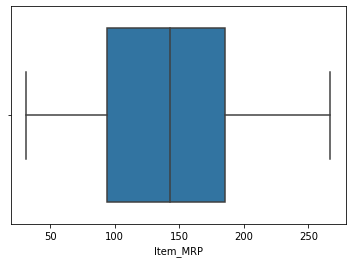

In [655]:
sns.boxplot(x=data['Item_MRP'])

In [656]:
#dropping those which price<80 and price>260
data  = data[(data['Item_MRP']>=80) & (data['Item_MRP']<=260)]

In [657]:
#checking outlier of Item_Outlet_Sales
data['Item_Outlet_Sales'].describe()

count    6782.000000
mean     2451.656432
std      1693.670065
min        79.230200
25%      1225.072000
50%      2142.544400
75%      3372.942800
max     13086.964800
Name: Item_Outlet_Sales, dtype: float64

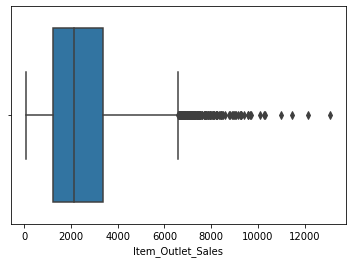

In [658]:
sns.boxplot(x=data['Item_Outlet_Sales'])

In [659]:
#dropping outlier of Item_Outlet_Sales
data = data[(data['Item_Outlet_Sales']<=6000) & (data['Item_Outlet_Sales']>=100)]


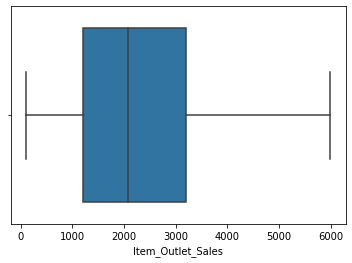

In [660]:
sns.boxplot(x=data['Item_Outlet_Sales'])

In [661]:
#dropping some row where Item_Identifier are only two or less

In [662]:
uni_item_identifier = list(data['Item_Identifier'].unique())

for i in uni_item_identifier:
    ind = list(data[data['Item_Identifier']==i].index)
    
    if len(ind)<=2:
        data.drop(ind, axis=0, inplace=True)

In [663]:
#DROPPING THOSE ROWS WHERE HAVE Item_Type<=10

In [664]:
uni_item = list(data['Item_Type'].unique())

for i in uni_item:
    uni=list(data[data['Item_Type']==i].index)
    
    if len(uni)<=10:
        data.drop(uni, axis=0, inplace=True)

same product but different price in different outlet because some products price depends on location.
In different location need different cheering cost

In [665]:
data[data['Item_Identifier']=='NCQ02']

,Item_Identifier,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1484,NCQ02,Household,186.755600,OUT013,Tier 3,Supermarket,2816.334000
2581,NCQ02,Household,186.955600,OUT035,Tier 2,Supermarket,3942.867600
5984,NCQ02,Household,186.955600,OUT049,Tier 1,Supermarket,3379.600800


In [666]:
#adding a new column
data['Number_Item'] = data['Item_Outlet_Sales']/data['Item_MRP']
data['Number_Item'] = data['Number_Item'].astype(int)

In [667]:
data.head()

,Item_Identifier,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Number_Item
0,FDB38,Canned,158.992000,OUT046,Tier 1,Supermarket,1757.712000,11
1,FDQ15,Meat,81.727600,OUT049,Tier 1,Supermarket,2030.690000,24
2,NCC54,Health and Hygiene,242.419600,OUT035,Tier 2,Supermarket,5543.450800,22
3,FDH41,Frozen Foods,214.553400,OUT013,Tier 3,Supermarket,3440.854400,16
4,NCB54,Health and Hygiene,126.233600,OUT017,Tier 2,Supermarket,1406.169600,11


# Data Encoding

In [668]:
#fixing 'Outlet_Identifier' column

In [669]:
data['Outlet_Identifier'].unique()

array(['OUT046', 'OUT049', 'OUT035', 'OUT013', 'OUT017', 'OUT045',
       'OUT019', 'OUT018', 'OUT010', 'OUT027'], dtype=object)

every outlet identifier have same 4 chacracter('Out0'). 
That is meaning nothing, for this I have taken only interger number, those are unique.


In [670]:
data['Outlet_Identifier'] = data['Outlet_Identifier'].str.replace('OUT0','')
data['Outlet_Identifier'] = data['Outlet_Identifier'].astype(int)

In [671]:
data['Outlet_Identifier'].unique()

array([46, 49, 35, 13, 17, 45, 19, 18, 10, 27])

In [672]:
#from categorical to numerical using get_dummies()

In [673]:
Item_Identifier__dummy = pd.get_dummies(data['Item_Identifier'])
Item_Type__dummy = pd.get_dummies(data['Item_Type'])
outlet_location__dummy = pd.get_dummies(data['Outlet_Location_Type'])
Outlet_Type__dummy = pd.get_dummies(data['Outlet_Type'])

In [674]:
#adding dummies data 

In [675]:
data = pd.concat([data, Item_Identifier__dummy, Item_Type__dummy, outlet_location__dummy, Outlet_Type__dummy], axis=1)

In [676]:
data.head()

,Item_Identifier,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Number_Item,DRA12,DRA24,...,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket
0,FDB38,Canned,158.992000,46,Tier 1,Supermarket,1757.712000,11,0,0,...,0,0,0,0,0,1,0,0,0,1
1,FDQ15,Meat,81.727600,49,Tier 1,Supermarket,2030.690000,24,0,0,...,0,0,0,0,0,1,0,0,0,1
2,NCC54,Health and Hygiene,242.419600,35,Tier 2,Supermarket,5543.450800,22,0,0,...,0,0,0,0,0,0,1,0,0,1
3,FDH41,Frozen Foods,214.553400,13,Tier 3,Supermarket,3440.854400,16,0,0,...,0,0,0,0,0,0,0,1,0,1
4,NCB54,Health and Hygiene,126.233600,17,Tier 2,Supermarket,1406.169600,11,0,0,...,0,0,0,0,0,0,1,0,0,1


In [677]:
#dividing dataset into feature and label data

In [678]:
X = data.drop(['Item_Identifier','Item_Type','Outlet_Location_Type', 'Outlet_Type','Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

In [679]:
#feature data
X.head()

,Item_MRP,Outlet_Identifier,Number_Item,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,...,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket
0,158.992000,46,11,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,81.727600,49,24,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,242.419600,35,22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,214.553400,13,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,126.233600,17,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [680]:
#dividing feature and label data for training and testing
Xtrain,xtest, Ytrain,ytest = train_test_split(X,y, test_size=.2, random_state=0)

Text(0, 0.5, 'scores')

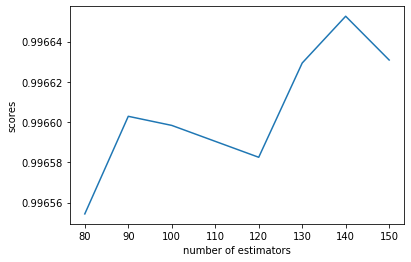

In [681]:
#checking with different n_estimator
n_estimator = [80,90,100,120,130,140,150]
scores = []

for i in n_estimator:
    algorithm = RandomForestRegressor(n_estimators=i)
    algorithm.fit(Xtrain,Ytrain)
    score = algorithm.score(xtest,ytest)
    scores.append(score)
    
plt.plot(n_estimator, scores)
plt.xlabel("number of estimators")
plt.ylabel('scores')
    


In [682]:
lr = RandomForestRegressor(n_estimators=120, random_state=42 )
lr.fit(Xtrain,Ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [683]:
predict = lr.predict(xtest)

In [684]:
lr.score(xtest,ytest)

0.9966134678799012

scores by cross_val_score

In [685]:
acc = cross_val_score(lr, X,y, cv=5)
acc

array([0.9964915 , 0.99694082, 0.99719834, 0.99683938, 0.99662643])

In [686]:
acc.mean()

0.9968192938598037

# Predicting outlet_sales

In [689]:
def predicting_function(Item_MRP, Outlet_Identifier, Number_Item, item_identifier, item_type, outlet_location, outlet_type):
    item_identifier_loc = np.where(item_identifier==X.columns)[0][0]
    item_type_loc = np.where(item_type==X.columns)[0][0]
    outlet_location_loc = np.where(outlet_location==X.columns)[0][0]
    outlet_type_loc = np.where(outlet_type==X.columns)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0]=Item_MRP
    x[1]=Outlet_Identifier
    x[2]=Number_Item
    
    if item_identifier_loc>=0 and item_type_loc>=0 and outlet_location_loc>=0 and outlet_type_loc>=0:
        x[item_identifier_loc]=1
        x[item_type_loc]=1
        x[outlet_location_loc]=1
        x[outlet_type_loc]=1
    return lr.predict([x])

In [690]:
predicting_function(220,46, 17, 'FDK60','Baking Goods','Tier 3','Supermarket')

array([3798.36125833])